In [11]:
import os
import random
from collections import Counter

import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from sklearn.base import defaultdict
from matplotlib import pyplot as plt, font_manager, rcParams


In [7]:
BASE_FONT_DIR = f"./fonts"
FONT_PATH = {
    "Noto Sans Javanese Regular": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Regular.ttf",
    # "Noto Sans Javanese Bold": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Bold.ttf",
    # "Noto Sans Javanese Medium": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Medium.ttf",
    # "Noto Sans Javanese SemiBold": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-SemiBold.ttf",
    # "Noto Sans Javanese Variable": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/NotoSansJavanese-VariableFont_wght.ttf",
    "AB Bakul": f"{BASE_FONT_DIR}/AB Bakul-Aditya Bayu-aksaradinusantara/AB bakul.ttf",
    "AB Wulang": f"{BASE_FONT_DIR}/AB Wulang-Aditya Bayu-aksaradinusantara/AB wulang.otf",
    # "Adipati Genk": f"{BASE_FONT_DIR}/Adipati genk-Adipati Genk Kobra-aksaradinusantara/Adipati Genk.ttf",
    "AR Demak Beta": f"{BASE_FONT_DIR}/AR Demak-Arif Budiarto-aksaradinusantara/ARDemakbeta-Regular.ttf",
    # "AR Demak Draft": f"{BASE_FONT_DIR}/AR Demak-Arif Budiarto-aksaradinusantara/Demak-draft.ttf",
    "CARAKAN JAWA": f"{BASE_FONT_DIR}/CARAKAN JAWA-Sudarto Hs_Ki Demang Sokowaten-aksaradinusantara/CARAKAN JAWA.otf",
    "Damarwulan": f"{BASE_FONT_DIR}/Damarwulan-Arif Budiarto-aksaradinusantara/damarwulan-bw.ttf",
    "Dhuwung": f"{BASE_FONT_DIR}/Font Dhuwung-Apri Nugroho-aksaradinusantara/File Font Aksara Jawa/DHUWUNG.ttf",
    # "Genk-Kobra Elysanti": f"{BASE_FONT_DIR}/Genk Kobra Elysanti-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Elysanti rev.ttf",
    # "Genk-Kobra Java": f"{BASE_FONT_DIR}/Genk Kobra Java-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Java rev.ttf",
    # "Genk-Kobra Javaholic": f"{BASE_FONT_DIR}/Genk Kobra Javaholic-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Jawa rev.ttf",
    # "Genk-Kobra JeJe": f"{BASE_FONT_DIR}/Genk Kobra JeJe-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra JeJe Rev.ttf",
    # "Genk-Kobra Ndomblong": f"{BASE_FONT_DIR}/Genk Kobra Ndomblong-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra ndomblong Rev.ttf",
    # "Gerbangpraja": f"{BASE_FONT_DIR}/Gerbangpraja Genk Kobra-Adipati Genk Kobra-aksaradinusantara/gerbangpraja.ttf",
    # "Gumregah New": f"{BASE_FONT_DIR}/Gumregah-Apri Nugroho-aksaradinusantara/Gumregah New.ttf",
    "Gumregah New FULL": f"{BASE_FONT_DIR}/Gumregah-Apri Nugroho-aksaradinusantara/Gumregah New FULL.ttf",
    "Jamawi": f"{BASE_FONT_DIR}/Jamawi-Arif Budiarto-aksaradinusantara/jamawi-v1r0.ttf",
    # "Javabugida": f"{BASE_FONT_DIR}/Javabugida Mahayu-Ervyn Raven-aksaradinusantara/javabugida_0001.otf",
    # "Java Genk-Kobra": f"{BASE_FONT_DIR}/Javaholic Genk-Adipati Genk Kobra-aksaradinusantara/Java Genk-Kobra Rev.ttf",
    "Nawatura Beta": f"{BASE_FONT_DIR}/Nawatura-Aditya Bayu-aksaradinusantara/Nawatura beta.ttf",
    # "Nawatura Beta Android": f"{BASE_FONT_DIR}/Nawatura-Aditya Bayu-aksaradinusantara/Nawatura beta android2.ttf",
    "Nayaka New": f"{BASE_FONT_DIR}/Nayaka-Apri Nugroho-aksaradinusantara/Nayaka New 2022.ttf",
    "New Kramawirya": f"{BASE_FONT_DIR}/New Kramawirya-Yayat Suhiryatna-aksaradinusantara/New Kramawirya1.ttf",
    "Nyk Ngayogyan Jejeg": f"{BASE_FONT_DIR}/nyk Ngayogyan Jejeg-Apri Nugroho-aksaradinusantara/nyk Ngayogyan Jejeg.ttf",
    "Nyk Ngayogyan New Italic": f"{BASE_FONT_DIR}/nyk Ngayogyan-Apri Nugroho-aksaradinusantara/nyk Ngayogyan New Italic.ttf",
    "Sehulbari": f"{BASE_FONT_DIR}/Sehulbari-Arif Budiarto-aksaradinusantara/Sehulbari.ttf",
    "Tuladha Jejeg": f"{BASE_FONT_DIR}/Tuladha Jejeg-R. S. Wihananto-aksaradinusantara/TuladhaJejeg_gr.ttf",
    "Djoharuddin": f"{BASE_FONT_DIR}/Djoharuddin-Aditya Bayu-aksaradinusantara.ttf",
}
print("Jumlah variasi font: ", len(FONT_PATH))


# Plot font configuration
font_manager.fontManager.addfont(FONT_PATH["Noto Sans Javanese Regular"])
rcParams["font.family"] = font_manager.FontProperties(fname=FONT_PATH["Noto Sans Javanese Regular"]).get_name()


Jumlah variasi font:  17


In [8]:
def plot_font_samples():
    sample_text = "ꦲꦗ"
    for font_name, font_path in FONT_PATH.items():
        try:
            font = ImageFont.truetype(font_path, 48)
        except Exception as e:
            print(f"Failed to load font {font_name}: {e}")
            continue

        dummy = Image.new("RGB", (1, 1))
        draw_dummy = ImageDraw.Draw(dummy)
        bbox = draw_dummy.textbbox((0, 0), sample_text, font=font)
        w = bbox[2] - bbox[0]
        h = bbox[3] - bbox[1]

        img = Image.new("RGB", (w, h), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)

        draw.text((-bbox[0], -bbox[1]), sample_text, font=font, fill=(0, 0, 0))

        plt.figure(figsize=(w/100, h/100), facecolor='white')
        plt.imshow(np.array(img))
        plt.title(font_name)
        plt.axis("off")
        plt.show()

# plot_font_samples()

Rendering train
Font usage in train:
Dhuwung: 65
Nawatura Beta: 64
Noto Sans Javanese Regular: 63
Nayaka New: 63
Sehulbari: 62
AR Demak Beta: 61
Nyk Ngayogyan Jejeg: 61
Damarwulan: 61
CARAKAN JAWA: 59
Djoharuddin: 58
New Kramawirya: 58
Gumregah New FULL: 57
Nyk Ngayogyan New Italic: 56
Jamawi: 55
AB Wulang: 54
Tuladha Jejeg: 52
AB Bakul: 51


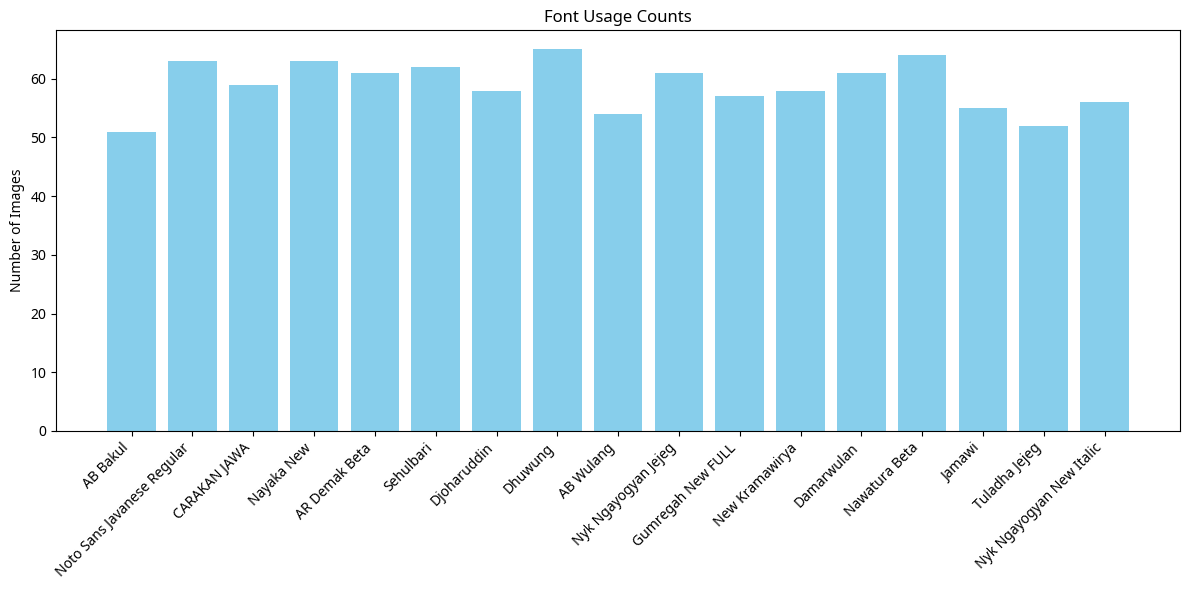

Rendering val
Font usage in val:
New Kramawirya: 14
Tuladha Jejeg: 13
Nawatura Beta: 13
Nyk Ngayogyan New Italic: 13
Dhuwung: 13
CARAKAN JAWA: 13
Nyk Ngayogyan Jejeg: 13
Damarwulan: 12
Gumregah New FULL: 12
AB Wulang: 11
Nayaka New: 11
Noto Sans Javanese Regular: 11
Djoharuddin: 11
AB Bakul: 10
AR Demak Beta: 10
Sehulbari: 10
Jamawi: 10


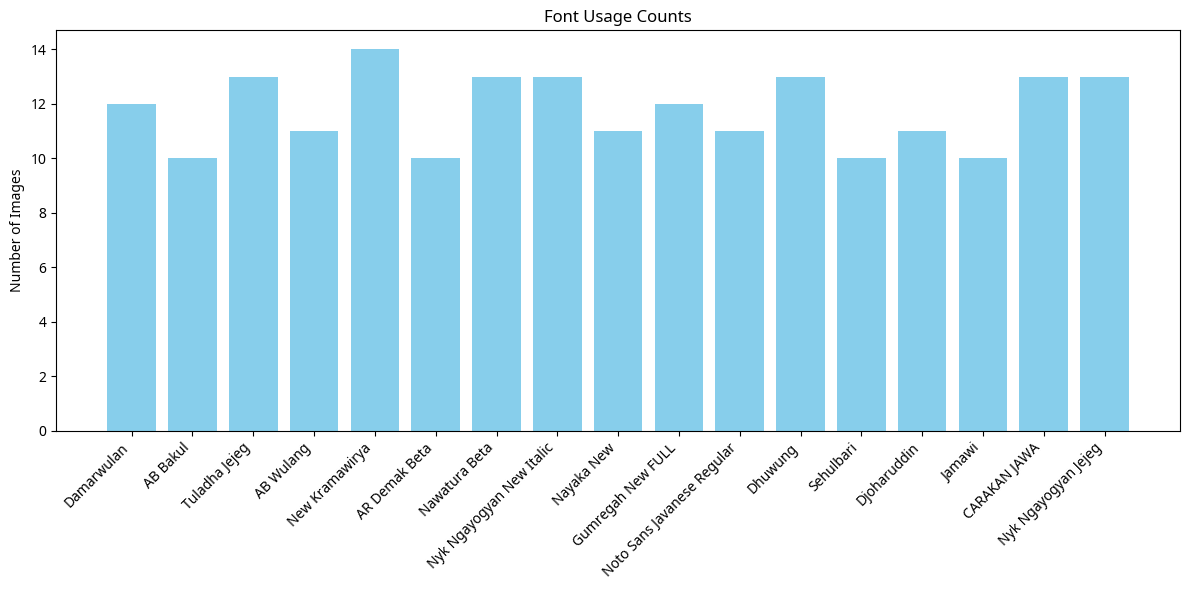

In [ ]:
def render_text(
    text: str,
    font_path: str,
    font_size: int = 48,
    target_height: int = 48,
    padding: int = 2,
    bg: int = 255,
    fg: int = 0,
):
    font = ImageFont.truetype(font_path, font_size)

    dummy = Image.new("L", (1, 1), bg)
    draw_dummy = ImageDraw.Draw(dummy)
    bbox = draw_dummy.textbbox((0, 0), text, font=font)
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]

    padded_w = w + 2 * padding
    padded_h = h + 2 * padding

    img = Image.new("L", (padded_w, padded_h), bg)
    draw = ImageDraw.Draw(img)

    draw.text((padding - bbox[0], padding - bbox[1]), text, fill=fg, font=font)

    if target_height is not None:
        new_w = max(1, int(padded_w * target_height / padded_h))
        img = img.resize((new_w, target_height), Image.BILINEAR)

    return img


def render_dataset_from_csv(
    csv_path: str,
    img_dir: str,
    font_paths: dict,
    font_size: int = 48,
    target_height: int = 48,
    padding: int = 2,
):
    os.makedirs(img_dir, exist_ok=True)
    df = pd.read_csv(csv_path)

    font_names = list(font_paths.keys())
    font_files = list(font_paths.values())
    font_coverage = Counter()

    if "font_used" not in df.columns:
        df["font_used"] = ""

    for i, (_, row) in enumerate(df.iterrows()):
        weights = [1 / (font_coverage[f] + 1) for f in font_names]
        font_path = random.choices(font_files, weights=weights, k=1)[0]
        font_name = font_names[font_files.index(font_path)]
        font_coverage[font_name] += 1

        img = render_text(
            text=row["transcription"],
            font_path=font_path,
            font_size=font_size,
            target_height=target_height,
            padding=padding,
        )

        img.save(os.path.join(img_dir, row["image"]))
        df.at[i, "font_used"] = font_name

    df.to_csv(csv_path, index=False)

    return font_coverage



BASE_DATA_DIR = "data/word_nglegena_synthetic_20260109_200304"
splits = {
    "train": "label_train.csv",
    "val": "label_val.csv",
}

for split, csv_name in splits.items():
    csv_path = os.path.join(BASE_DATA_DIR, csv_name)
    img_dir = os.path.join(BASE_DATA_DIR, f"image_{split}")

    print(f"Rendering {split}")
    coverage = render_dataset_from_csv(
        csv_path=csv_path,
        img_dir=img_dir,
        font_paths=FONT_PATH,
        font_size=48,
        target_height=48,
        padding=2,
    )

    print(f"Font usage in {split}:")
    for font, count in coverage.most_common():
        print(f"{font}: {count}")
    plt.figure(figsize=(12, 6)) 
    plt.bar(coverage.keys(), coverage.values(), color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Number of Images")
    plt.title("Font Usage Counts")
    plt.tight_layout()
    plt.show()

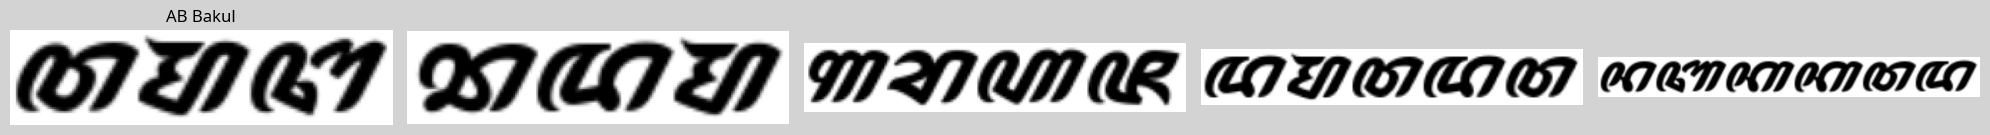

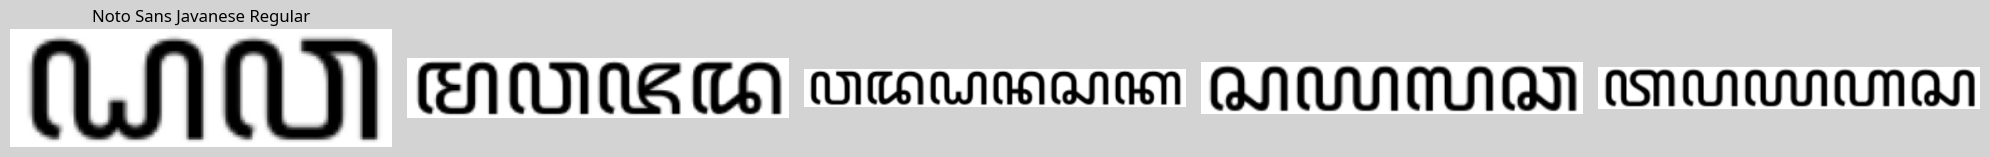

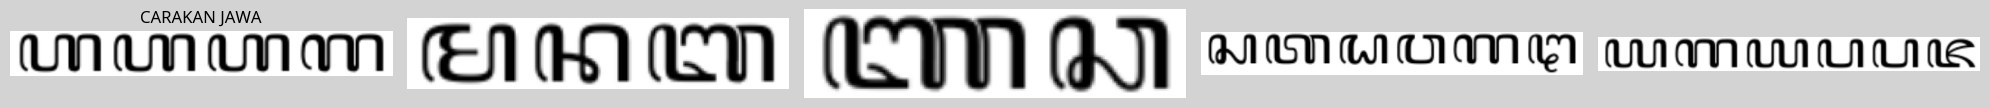

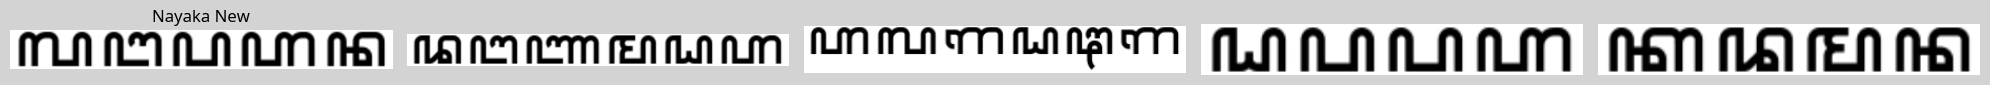

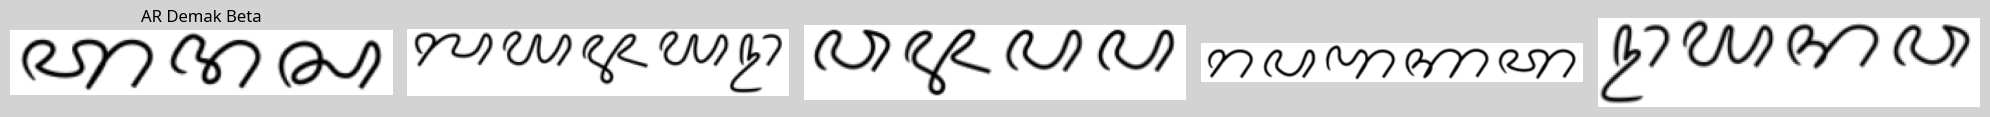

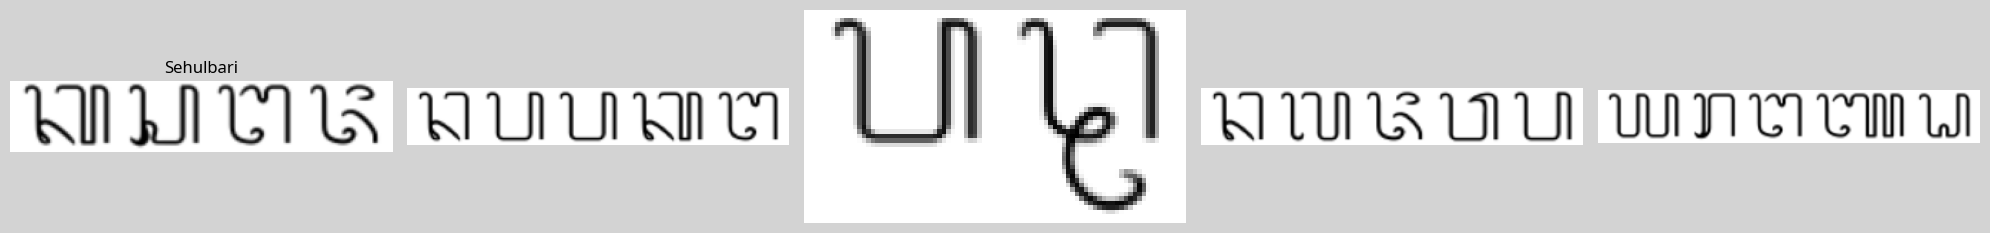

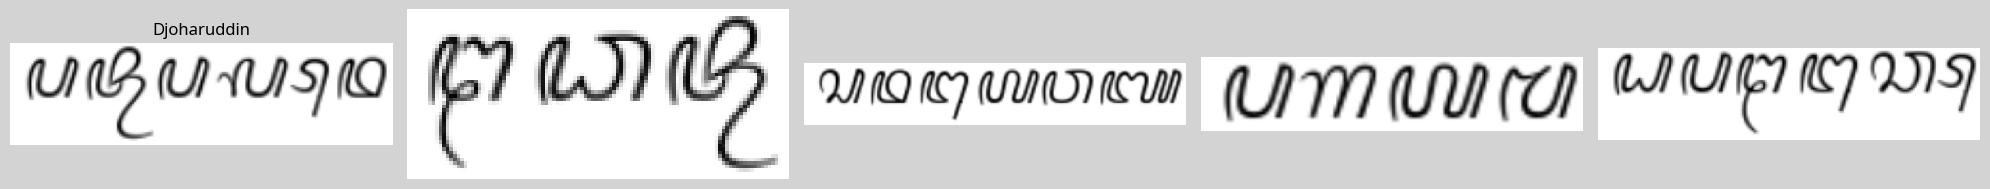

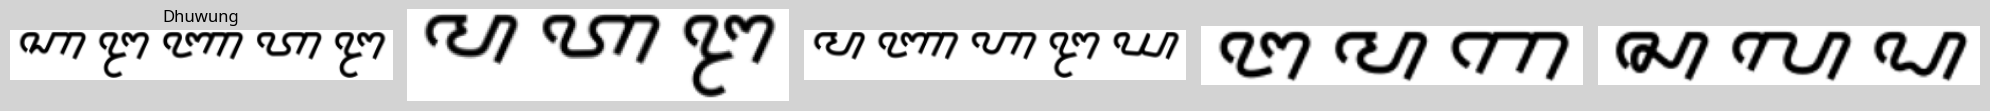

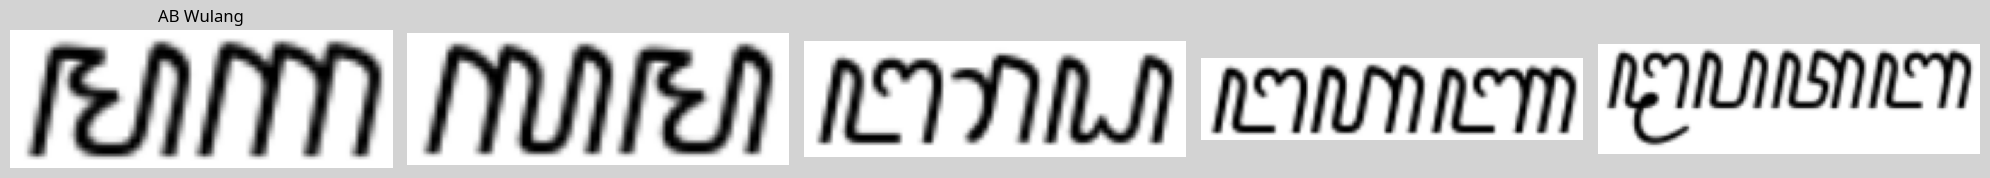

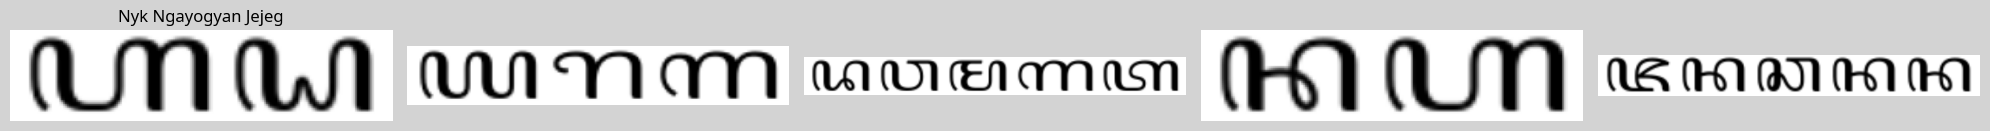

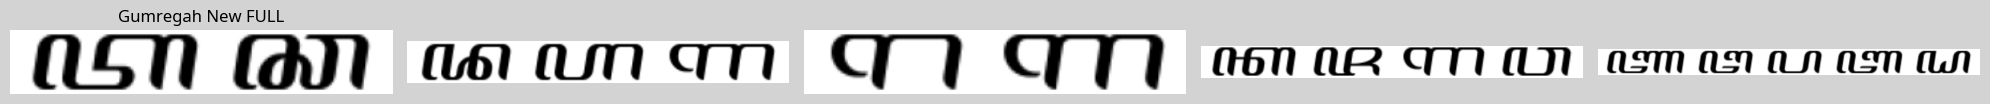

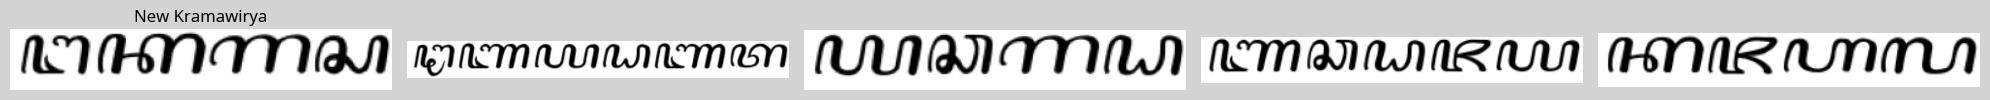

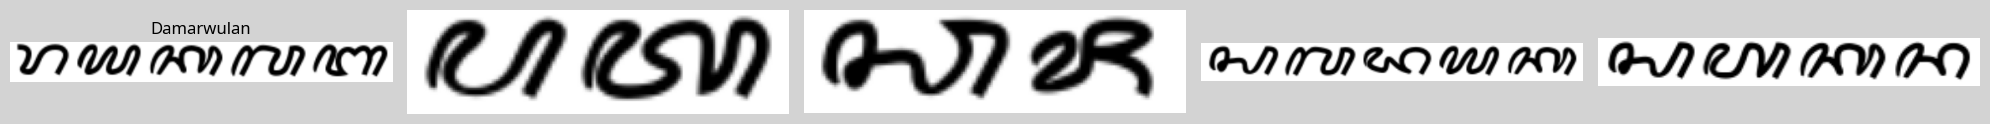

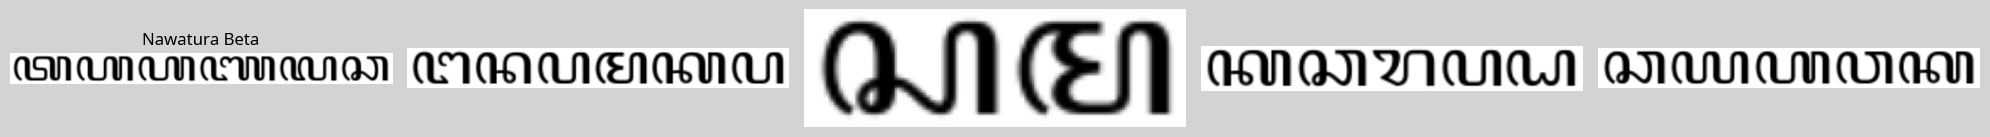

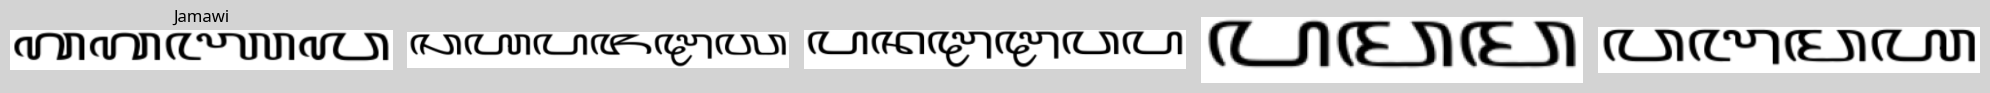

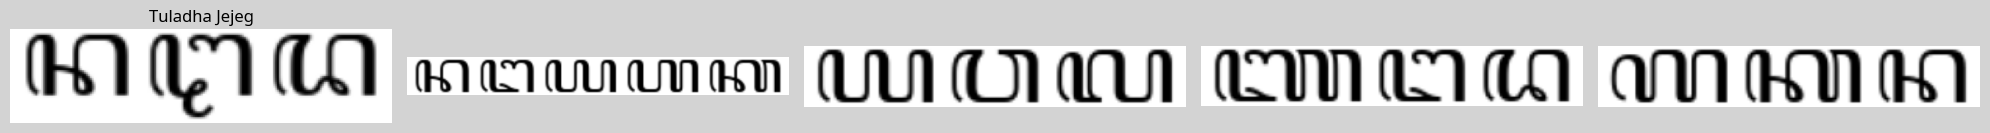

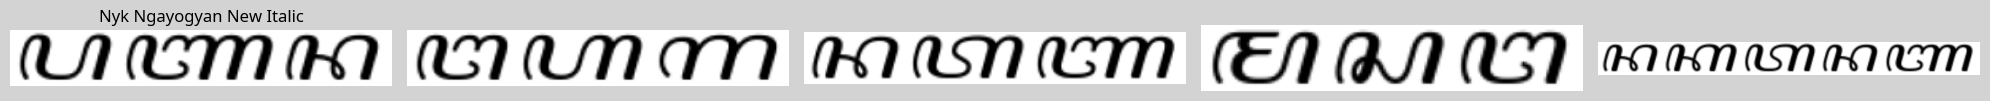

In [ ]:
def visualize_font_samples(
    csv_path: str,
    image_dir: str,
    samples_per_font: int = 5,
    cmap: str = "gray",
):
    df = pd.read_csv(csv_path)

    required_cols = {"image", "font_used"}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"CSV harus mengandung kolom {required_cols}")

    font_to_images = defaultdict(list)
    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row["image"])
        if os.path.exists(img_path):
            font_to_images[row["font_used"]].append(img_path)

    for _, (font_name, img_list) in enumerate(font_to_images.items()):
        if not img_list:
            continue

        samples = random.sample(
            img_list, min(samples_per_font, len(img_list))
        )

        plt.figure(
            figsize=(samples_per_font * 4, 4),
            facecolor="lightgray"
        )

        for i, img_path in enumerate(samples):
            img = Image.open(img_path)
            ax = plt.subplot(1, samples_per_font, i + 1)
            ax.imshow(img, cmap=cmap)
            ax.axis("off")

            if i == 0:
                ax.set_title(font_name, fontsize=12)

        plt.tight_layout()
        plt.show()

# visualize_font_samples("data/word_nglegena_synthetic_20260109_200304/label_train.csv", "data/word_nglegena_synthetic_20260109_200304/image_train", 5)